### 0.1 Import libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_absolute_error, mean_squared_error

### 0.2 Load data

In [2]:
data = pd.read_csv('dataset/train.csv')
# data = data.drop('id', 1)

# split into train and test
train, test = train_test_split(data, test_size=0.2)

## 1. Data preparation:
* Exploration (EDA) & Visualizaiton
* Cleaning
* Wrangling & Feature Engineering

### 1.1 Exploration (EDA) & Visualizaiton

#### General info about data

In [3]:
train.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
35947,5077231,6.107023,Townhouse,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",8,3.0,Real Bed,strict,True,...,34.085565,-118.366937,Spacious 3 Bedroom w/ Rooftop Deck!,West Hollywood,19,100.0,NaN,90046,3.0,4.0
47573,16590794,3.555348,Condominium,Private room,"{Internet,""Wireless Internet"",Pool,""Free parki...",2,1.0,Real Bed,strict,True,...,33.897947,-118.360245,Clean+cozy bedroom and own bathroom,Lawndale,10,100.0,https://a0.muscache.com/im/pictures/b8a9618b-d...,90260,1.0,1.0
40088,14722711,4.595120,Loft,Private room,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,strict,True,...,34.044266,-118.250390,Modern private room DTLA,NaN,0,NaN,https://a0.muscache.com/im/pictures/60d90a72-3...,90014,1.0,1.0
25638,16131498,5.521461,Apartment,Entire home/apt,"{""Air conditioning"",Kitchen,Heating,""Family/ki...",5,2.0,Real Bed,flexible,False,...,38.943785,-77.024480,SIS,Petworth,0,NaN,https://a0.muscache.com/im/pictures/bb130ac5-c...,20011,2.0,5.0
60324,16898261,4.976734,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Poo...",3,1.0,Real Bed,strict,True,...,34.068849,-118.450861,Modern 1 bedroom apartment next to UCLA,Westwood,1,100.0,https://a0.muscache.com/im/pictures/a628b52c-7...,90024,1.0,1.0


In [4]:
len(train), len(test)

(59288, 14823)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [6]:
train.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,5.928800e+04,59288.000000,59288.000000,59130.000000,59288.000000,59288.000000,59288.000000,45861.000000,59213.000000,59183.000000
mean,1.124233e+07,4.779892,3.152392,1.237544,38.438964,-92.463152,20.929244,94.050261,1.265871,1.710762
std,6.085983e+06,0.719425,2.148996,0.587064,3.086450,21.709629,37.780167,7.881812,0.851833,1.254042
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.238957e+06,4.304065,2.000000,1.000000,34.126465,-118.342649,1.000000,92.000000,1.000000,1.000000
50%,1.221920e+07,4.700480,2.000000,1.000000,40.661910,-76.999184,6.000000,96.000000,1.000000,1.000000
75%,1.639152e+07,5.220356,4.000000,1.000000,40.746372,-73.954447,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


#### Data operations

In [7]:
binary_variables = ['cleaning_fee', 'host_has_profile_pic', 'host_identity_verified', 'instant_bookable']

categorical_variables = ['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'city',
                         'neighbourhood', 'amenities']

numeric_variables = ['log_price', 'accommodates', 'bathrooms', 'host_response_rate', 'latitude', 'longitude',
                     'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds']  

column_to_drop = ['id', 'name', 'thumbnail_url', 'zipcode', 'description', 'first_review',
                  'host_since', 'last_review']

columns = {'binary_variables': binary_variables, 'categorical_variables': categorical_variables,
           'numeric_variables': numeric_variables, 'column_to_drop': column_to_drop, 'binned_variables': []}

#### Histograms

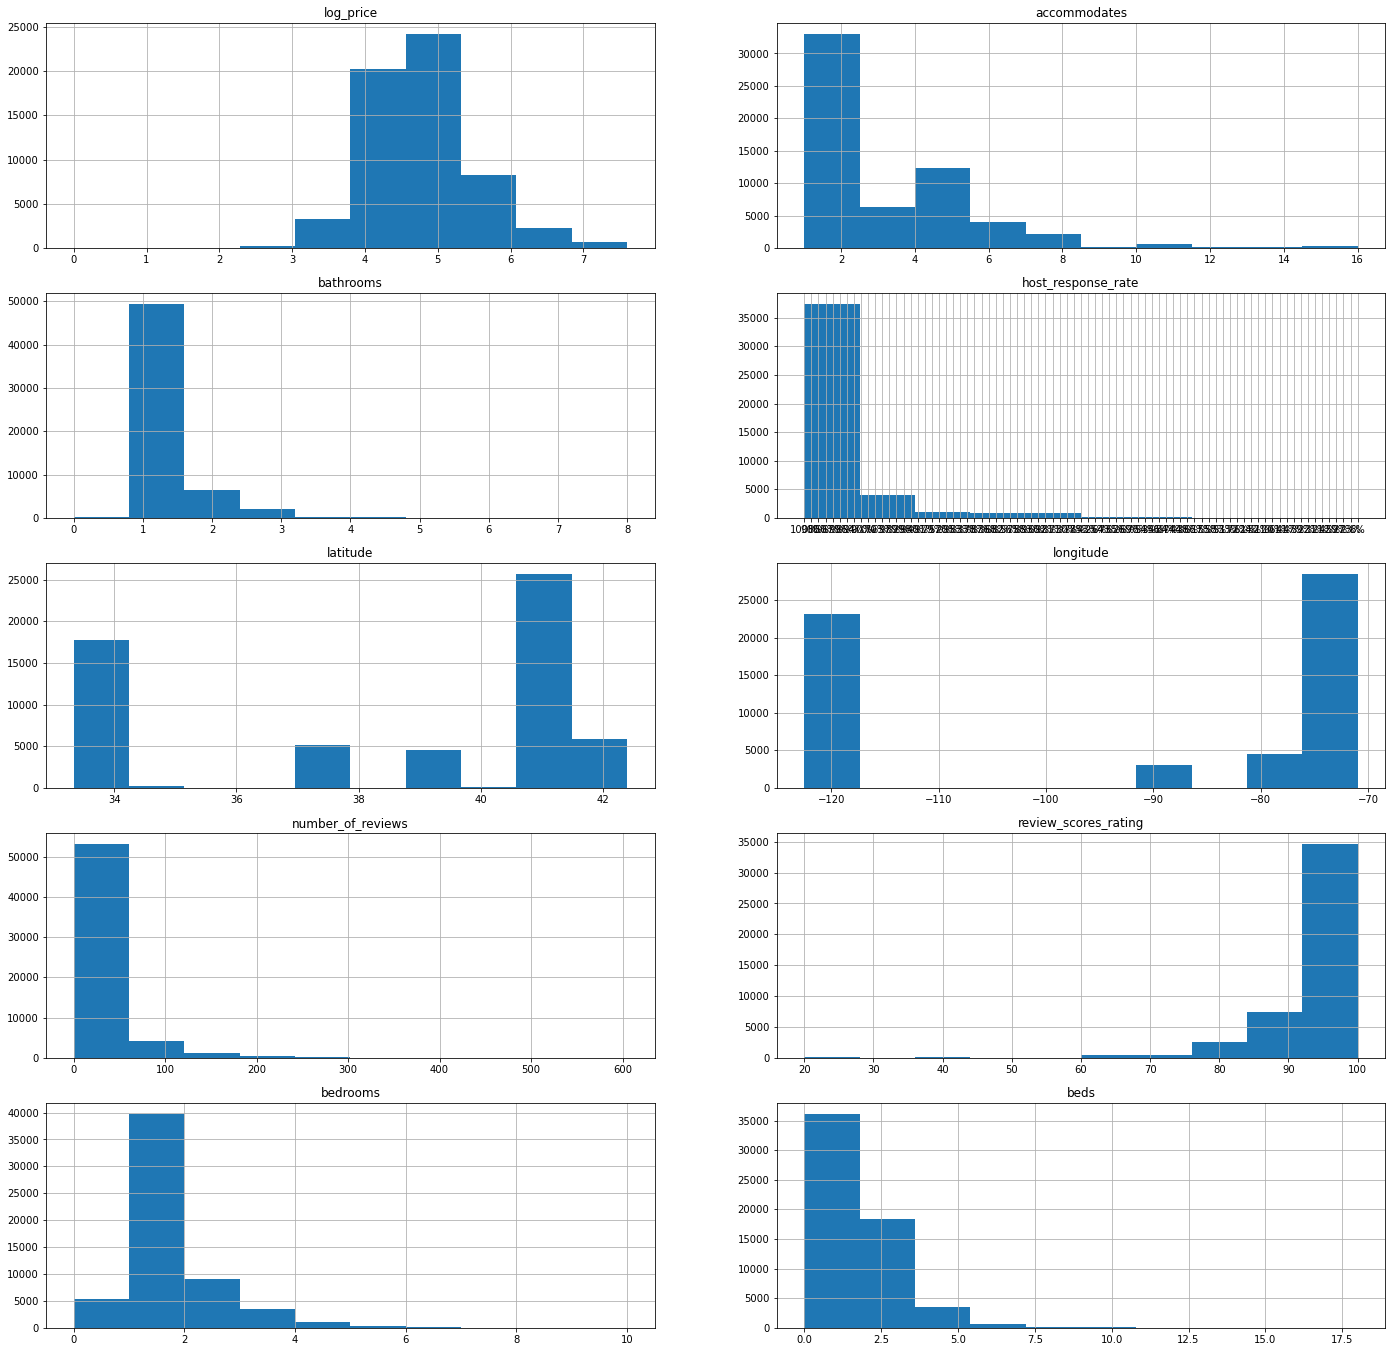

In [8]:
#initialize a Matplotlib figures grid
fig, axes = plt.subplots(5, 2,figsize=(24,24))

#generate a histogram using Pandas, for each numeric variable
# TODO bin host_response_rate
for i in range(5):
    for j in range(2):
        var = numeric_variables[i*2+j]
        train[var].hist(ax=axes[i,j])
        axes[i,j].set_title(var)


IndexError: index 3 is out of bounds for axis 0 with size 3

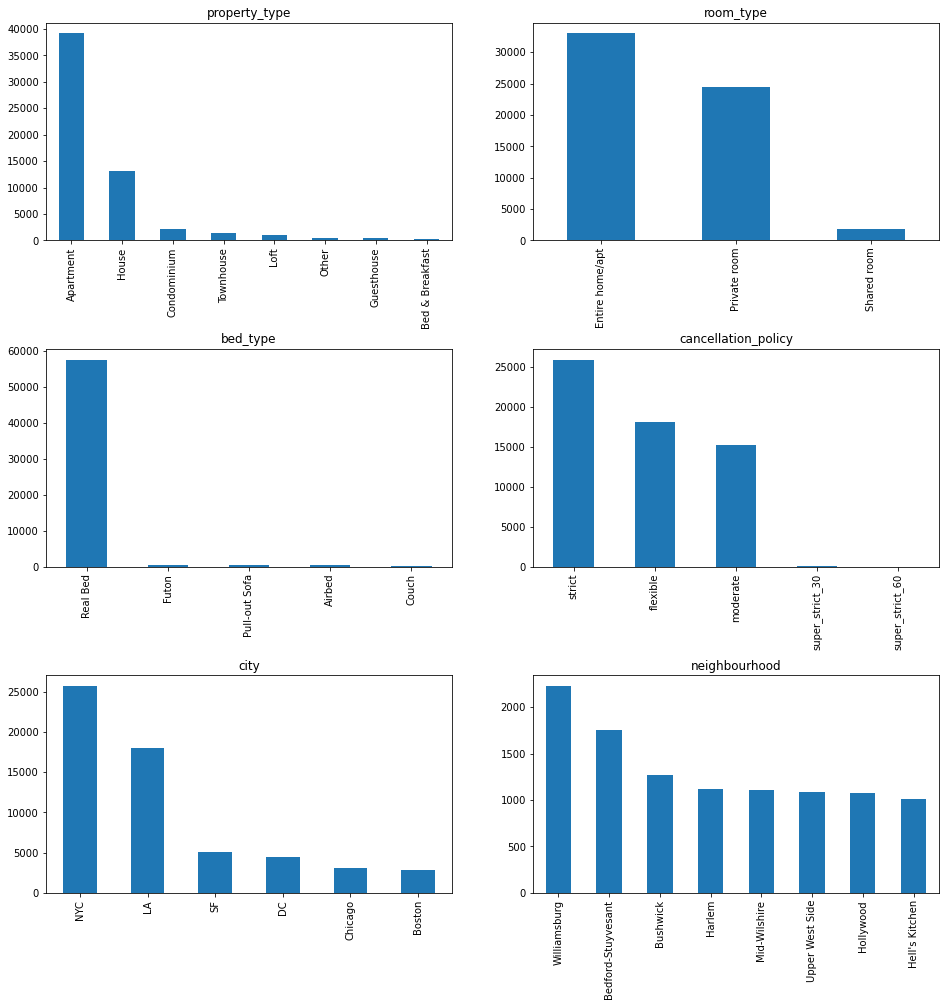

In [9]:
#generate a figures grid:
fig, axes = plt.subplots(3,2,figsize=(16,16))
fig.subplots_adjust(hspace=0.5)

#we will create a histogram for each categorical attribute
n=len(categorical_variables)
num_rows = 2
max_bars = 8

for i,variable in enumerate(categorical_variables):
    #calculate the current place on the grid
    r=int(i/num_rows)
    c=i%num_rows
    
    #create the "value counts" for the first <max_bars> categories:
    u=min(train[variable].nunique(),max_bars)
    vc = train[variable].value_counts()[:u]
    
    # plot a bar chart using Pandas
    vc.plot(kind='bar',ax=axes[r,c],title=variable)

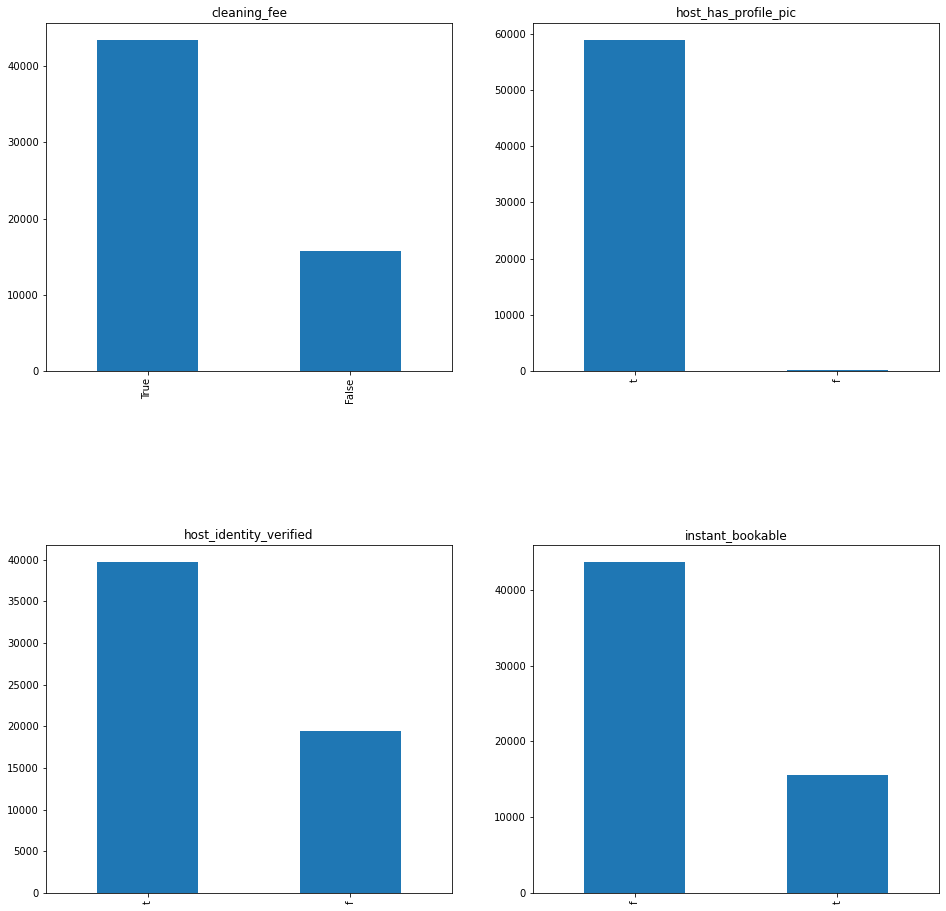

In [10]:
#generate a figures grid:
fig, axes = plt.subplots(2,2,figsize=(16,16))
fig.subplots_adjust(hspace=0.5)

#we will create a histogram for each categorical attribute
n=len(binary_variables)
num_rows = 2
max_bars = 8

for i,variable in enumerate(binary_variables):
    #calculate the current place on the grid
    r=int(i/num_rows)
    c=i%num_rows
    
    #create the "value counts" for the first <max_bars> categories:
    u=min(train[variable].nunique(),max_bars)
    vc = train[variable].value_counts()[:u]
    
    # plot a bar chart using Pandas
    vc.plot(kind='bar',ax=axes[r,c],title=variable)

##### Correlations

<AxesSubplot:>

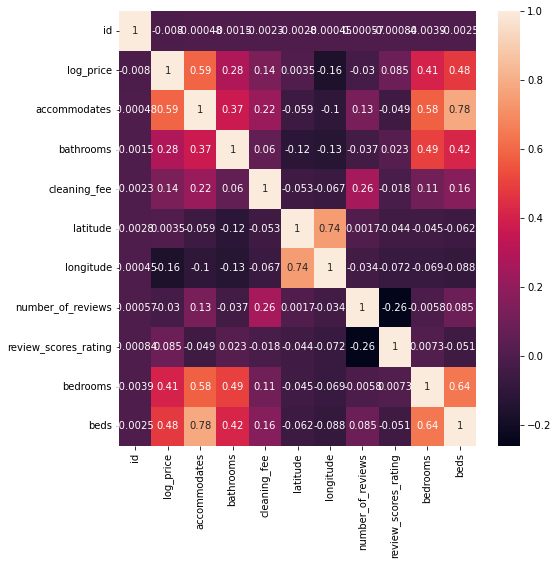

In [11]:
plt.figure(figsize=(8,8))
sns.heatmap(train.corr(method='spearman'), annot=True)
# TODO feature class correlation

In [12]:
# Count nan values
len(train) - train.count()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   158
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              12734
host_has_profile_pic        151
host_identity_verified      151
host_response_rate        14646
host_since                  151
instant_bookable              0
last_review               12701
latitude                      0
longitude                     0
name                          0
neighbourhood              5538
number_of_reviews             0
review_scores_rating      13427
thumbnail_url              6610
zipcode                     773
bedrooms                     75
beds                        105
dtype: int64

#### Number of unique values

In [13]:
for var in binary_variables:
    print(var, len(train[var].unique()))

for var in categorical_variables:
    print(var, len(train[var].unique()))

for var in numeric_variables:
    print(var, len(train[var].unique()))

cleaning_fee 2
host_has_profile_pic 3
host_identity_verified 3
instant_bookable 2
property_type 34
room_type 3
bed_type 5
cancellation_policy 5
city 6
neighbourhood 609
amenities 54327
log_price 738
accommodates 16
bathrooms 18
host_response_rate 80
latitude 59288
longitude 59288
number_of_reviews 357
review_scores_rating 54
bedrooms 12
beds 19


### 1.2 Cleaning

#### Drop Unnecessary Column


In [14]:
for column in columns['column_to_drop']:
    train = train.drop(column, axis=1)
    test = test.drop(column, axis=1)

#### Type Conversion


Boolean Variables hendling



In [15]:
for column in columns['binary_variables']:
    train[column] = train[column].apply(lambda x: True if x == 'TRUE' or x == 't' else False)
    test[column] = test[column].apply(lambda x: True if x == 'TRUE' or x == 't' else False)


Numeric Variables to Float


In [16]:
train['host_response_rate'] = train['host_response_rate'].str.rstrip('%').astype('float') / 100.0
test['host_response_rate'] = test['host_response_rate'].str.rstrip('%').astype('float') / 100.0

In [17]:
for column in columns['numeric_variables']:
    train[column] = train[column].astype(float)
    test[column] = test[column].astype(float)

#### Impute Missing Values

In [18]:
null_columns = []
for column in columns['binary_variables'] + columns['categorical_variables'] + columns['numeric_variables']:
    if train[column].isnull().sum():
        null_columns.append(column)
    if test[column].isnull().sum():
        null_columns.append(column)

In [19]:
train_with_most_frequent_values = train.copy()
test_with_most_frequent_values = test.copy()
for column in null_columns:
    val = train_with_most_frequent_values[column].value_counts().index[0]
    train_with_most_frequent_values[column] = train_with_most_frequent_values[column].fillna(val)
    test_with_most_frequent_values[column] = test_with_most_frequent_values[column].fillna(val)

train = train_with_most_frequent_values
test = test_with_most_frequent_values

#### Reset Indexes


In [20]:
train = train.reset_index()
test = test.reset_index()

### 1.3 Wrangling & Feature Engineering


#### amenities

In [21]:
def collect_amenities(data, columns_dict):
    chars_to_remove = '"{}'
    amenities_set = set()
    for line in data['amenities']:
        amenities = line.split(',')
        for obj in amenities:
            for char in chars_to_remove:
                obj = obj.replace(char, "")
            if "translation missing" not in obj and obj != '':
                amenities_set.add(obj)
    for amenity in amenities_set:
        columns_dict['binary_variables'].append(amenity)
    return list(amenities_set)


def create_amenities_array(amenities_list, data):
    amenities_array = []
    for index, row in data.iterrows():
        array = np.zeros(shape=(len(amenities_list)))
        row_amen = data['amenities'][index].split(',')
        for amen in row_amen:
            item = amen.replace('"', '').replace('}', '').replace('{', '')
            if item in amenities_list:
                res = amenities_list.index(item)
                array[res] = 1
        amenities_array.append(array.tolist())

    amenities_df = pd.DataFrame(amenities_array, columns=amenities_list)
    return amenities_df


# converting amenities column to binary columns and updating columns_dict
def create_amenities_cols(data, amenities_set):
    amenities_array = create_amenities_array(amenities_set, data)

    data = data.drop(['amenities'], axis=1)
    data = pd.concat([data, amenities_array], axis=1)

    return data

In [22]:
amenities_list = collect_amenities(train, columns)
train = create_amenities_cols(train, amenities_list)
test = create_amenities_cols(test, amenities_list)
columns['categorical_variables'].remove('amenities')

#### neighbourhood

In [23]:
top_neighbourhoods = train['neighbourhood'].value_counts().head(50).keys()
for index, row in train.iterrows():
    if row['neighbourhood'] not in top_neighbourhoods:
        train.at[index,'neighbourhood'] = 'other'
for index, row in test.iterrows():
    if row['neighbourhood'] not in top_neighbourhoods:
        test.at[index,'neighbourhood'] = 'other'

#### one hot encoding gor catagorial varaiables

In [24]:
# we leave the target feature as is
oh_train = train['log_price']
oh_test = test['log_price']

# now adding the one hot encoded data
for variable in columns['binned_variables']+columns['categorical_variables']:
    onehot_train_col = pd.get_dummies(train[variable], prefix=variable)
    oh_train = pd.concat([oh_train, onehot_train_col], axis=1)

    onehot_test_col = pd.get_dummies(test[variable], prefix=variable)
    oh_test = pd.concat([oh_test, onehot_test_col], axis=1)

#### concatenating binary varaiables 

In [25]:
for col in columns['binary_variables']:
    train[col] = train[col].replace(True, 1)
    train[col] =train[col].replace(False, 0)
    oh_train = pd.concat([oh_train, train[col]], axis=1)

    test[col] = test[col].replace(True, 1)
    test[col] = test[col].replace(False, 0)
    oh_test = pd.concat([oh_test, test[col]], axis=1)

#### concatenating numeric varaiables

In [26]:
for col in columns['numeric_variables']:
    if col != 'log_price':
        oh_train = pd.concat([oh_train, train[col]], axis=1)

        oh_test = pd.concat([oh_test, test[col]], axis=1)

#### equalize cloumns

In [27]:
add_to_test = list(set(oh_train.columns) - set(oh_test.columns))
add_to_train = list(set(oh_test.columns) - set(oh_train.columns))
for col in add_to_train:
    oh_train[col] = 0
for col in add_to_test:
    oh_test[col] = 0

oh_test = oh_test[oh_train.columns]

/tmp/ipykernel_26646/66377348.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  oh_train[col] = 0
/tmp/ipykernel_26646/66377348.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  oh_test[col] = 0


## 2. Train Model: Logistic regression

In [28]:
linear_regression = linear_model.LinearRegression()
# separate labels from data=
train_class = oh_train['log_price']
oh_train_data = oh_train.drop('log_price', axis=1)
# train the model:
linear_regression.fit(oh_train_data, train_class)
print(linear_regression)

LinearRegression()


## 3. Evaluate results

In [29]:
def plot_evaluation(model, train_x, train_y, test_x, test_y, prediction_test):
    #show_metrics(prediction_test, prediction_train, test_y, train_y)
    r2 = r2_score(test_y, prediction_test)
    print('r2 score:', r2)

    print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):",
          "{:,.3f}".format(mean_absolute_percentage_error(test_y, prediction_test)))
    print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.3f}".format(mean_absolute_error(test_y, prediction_test)))
    print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.3f}".
          format(np.sqrt(mean_squared_error(test_y, prediction_test))))

    ## residuals
    residuals = test_y - prediction_test
    max_error = max(prediction_test) if abs(max(residuals)) > abs(min(residuals)) else min(residuals)
    max_idx = list(residuals).index(max(residuals)) if abs(max(residuals)) > abs(min(residuals)) else list(
        residuals).index(min(residuals))
    max_true, max_pred = test_y[max_idx], prediction_test[max_idx]
    print("Max Error:", "{:,.0f}".format(max_error))

    # fig, ax = plt.subplots(figsize=(8, 5))
    sns.scatterplot(x=prediction_test, y=test_y)
    sns.lineplot(x=prediction_test, y=prediction_test, color='black')
    plt.title('true values against the predicted values')
    plt.show()

    fig, ax = plt.subplots(1, 2, figsize=(16, 5))
    sns.scatterplot(x=prediction_test, y=residuals, ax=ax[0])
    sns.lineplot(x=prediction_test, y=0, ax=ax[0], color='black')
    ax[0].set_title("Residuals (Abs)")
    sns.scatterplot(x=prediction_test, y=residuals / test_y, ax=ax[1])
    sns.lineplot(x=prediction_test, y=0, ax=ax[1], color='black')
    ax[1].set_title("Residuals (%)")
    plt.show()

    rel_res = residuals / test_y

    rel_res = abs(rel_res)
    print(len(rel_res[rel_res < 0.05]) / len(rel_res))
    print(len(rel_res[rel_res > 0.2]) / len(rel_res))

    model_analysis(model, train_x)
    # todo - shap
    # shap_cal(model, train_x, test_x, test_y, rel_res, prediction_test, residuals)

    # https://www.kaggle.com/code/mohamedmokhtar7/airbnb-eda-and-regression#kln-346
    sns.regplot(x=test_y, y=prediction_test, fit_reg=False)
    plt.title('Prediction and real')
    plt.show()

    sns.distplot(test_y - prediction_test, bins=50)
    plt.title('Error variance')
    plt.show()


r2 score: 0.6267233671069743
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.067
Mean Absolute Error (Σ|y-pred|/n): 0.317
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 0.433
Max Error: 8


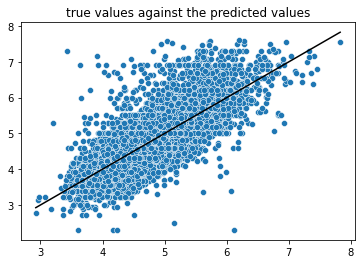

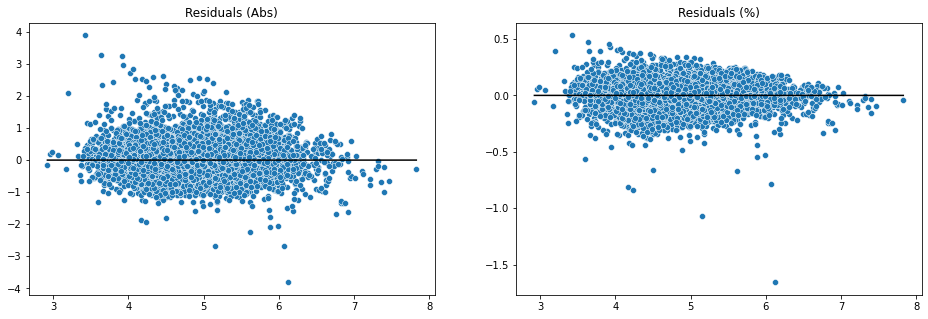

0.4899817850637523
0.03501315523173447


NameError: name 'model_analysis' is not defined

In [30]:
train_y = oh_train['log_price'].values
train_x = oh_train.drop('log_price', axis=1)
test_y = oh_test['log_price'].values
test_x = oh_test.drop('log_price', axis=1)

prediction_test = linear_regression.predict(test_x)
prediction_train = linear_regression.predict(train_x)

plot_evaluation(
    model=linear_regression,
    train_x=train_x,
    train_y=train_y,
    test_x=test_x,
    test_y=test_y,
    prediction_test=prediction_test)